In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import iqr
from statsmodels.stats.weightstats import ttest_ind
import matplotlib.pyplot as plt

df = pd.read_csv("waiting.csv")
consumo = df.loc[df.supermarket == "Consumo"]
sparag = df.loc[df.supermarket == "Sparag"]
df.head()

,waiting,supermarket
0,5.25,Consumo
1,4.58,Consumo
2,6.15,Consumo
3,0.93,Consumo
4,4.04,Consumo


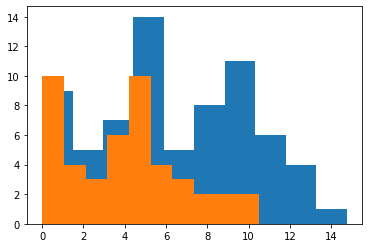

In [6]:
plt.hist(sparag.waiting)
plt.hist(consumo.waiting)
plt.show()

In [7]:
-sparag.waiting.mean()+consumo.waiting.mean()

-2.3734099378881988

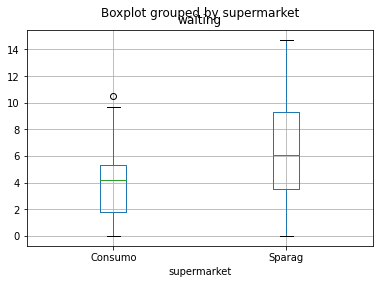

In [8]:
boxplot = df.boxplot(column="waiting", by="supermarket")

In [9]:
print(df.groupby("supermarket")["waiting"].mean())

supermarket
Consumo    3.991304
Sparag     6.364714
Name: waiting, dtype: float64


In [10]:
print(df.groupby("supermarket")["waiting"].describe())

             count      mean      std  min     25%    50%     75%    max
supermarket                                                             
Consumo       46.0  3.991304  2.88592  0.0  1.8375  4.195  5.3025  10.51
Sparag        70.0  6.364714  3.76597  0.0  3.5025  6.045  9.3150  14.74


In [13]:
consumo1 = df[df['supermarket']=="Consumo"]['waiting']
sparag1 = df[df['supermarket']=="Sparag"]['waiting']

ttest = ttest_ind(x1=sparag1, x2=consumo1, alternative="smaller", usevar="pooled")
print("t = {:.1f}, p-value = {:.1g}, df = {:.0f}".format(ttest[0],ttest[1],ttest[2]))

t = 3.6, p-value = 1, df = 114
